# GRAPH GENERATOR

Importing the relevant libraries:

In [1]:
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
import PIL

Importing images:

In [2]:
# Load images

files = {"node_water" : "../media/node_water.png",
         "node" : "../media/node.png",
         "origin" : "../media/origin.png",
         "dest" : "../media/dest.png",
         "headquarters" : "../media/headquarters.png",
         "base_1" : "../media/base_1.png",
         "base_2" : "../media/base_2.png",
         "base_3" : "../media/base_3.png"}

images = {name : PIL.Image.open(file) for name, file in files.items()}

Declaring auxiliary class:

In [3]:
# Class that will help create a connected graph

class UnionFind:
    def __init__(self, n):
        self.n = n  # number of trees in the forest
        self.v = [i for i in range(n)]  # initialize each disjoint set

    def find(self, u):
        while u != self.v[u]:
            self.v[u] = self.v[self.v[u]]  # compression technique
            u = self.v[u]
            
        return u
    
    def union(self, u, v):
        root_u, root_v = self.find(u), self.find(v)
        
        if root_u == root_v:
            return False  # union was not performed
        else:
            self.v[root_v] = root_u
            self.n -= 1

            return True  # union was not performed

Defining the generator:

 * The graph follows the pattern of a square grid
 * The supplied `N` value must be an integer with integer root

In [4]:
class GraphGenerator:
    def __init__(self, N=100):
        self.N = N  # number os cells (default is a 10x10 grid)
        self.edges = self.generate_edges()
        
    def water_network(self):        
        # Copy the edges and create a disjoint set for each cell
        edges = self.edges.copy()
        forest = UnionFind(self.N)
        
        # Generate a graph
        G = nx.Graph()
        
        # Adding nodes
        # Initial value of flow is True because, initially, it is a connected graph
        for v in range(self.N):
            G.add_node(v, node_prop=None, flow=True, image=images["node_water"])
        
        step = 2*(self.N**0.5) + 2
        
        origin = np.random.randint(0, self.N)
        dest = np.random.choice([v for v in range(self.N) if v < origin-step or v > origin+step])
    
        G.nodes[origin]["node_prop"] = "origin"
        G.nodes[origin]["image"] = images["origin"]
        G.nodes[dest]["node_prop"] = "dest"
        G.nodes[dest]["image"] = images["dest"]
        
        # Adding edges
        # Makes sure that the initial graph will be connected
        # Edges with endpoint at origin or destination are marked as red
        # This color represents the constraint that prevents the deletion of an edge
        while forest.n > 1:
            v, w = edges.pop(np.random.randint(0, len(edges)))
            forest.union(v, w)
            G.add_edge(v, w, color="red" if G.nodes[v]["node_prop"] or G.nodes[w]["node_prop"] else "blue")
                
        return G
    
    def military_network(self):        
        # Copy the edges and create a disjoint set for each cell
        edges = self.edges.copy()
        forest = UnionFind(self.N)
        
        # Generate a graph
        G = nx.Graph()
        
        # Adding nodes
        endurances = np.random.choice(np.arange(1, 4), self.N, [0.2, 0.2, 0.6])
        for v, e in enumerate(endurances):
            G.add_node(v, node_prop=None, endurance=e, provided=True, image=images[f"base_{e}"])
            
        headquarters = np.random.randint(0, self.N)
    
        G.nodes[headquarters]["node_prop"] = "headquarters"
        G.nodes[headquarters]["endurance"] = 10000  # headquarters is the most difficult enemy military installation to attack
        G.nodes[headquarters]["image"] = images["headquarters"]
        
        # Adding edges
        # Makes sure that the initial graph will be connected
        while forest.n > 1:
            v, w = edges.pop(np.random.randint(0, len(edges)))
            forest.union(v, w)
            G.add_edge(v, w)
            
        # Harder to attack military installations adjacent to headquarters
        for v in G[headquarters]:
            G.nodes[v]["node_prop"] = "secure"
            G.nodes[v]["endurance"] = 100
                
        return G
                
    def available_edges(self, v):
        shape = int(self.N**0.5)  # takes into account the dimensions of the grid
        
        available_edges = []
        if (v+1) % shape != 0:
            available_edges.append((v, v+1))
        if v+shape < self.N:
            available_edges.append((v, v+shape))

        return available_edges  # possible edges in cell v

    def generate_edges(self):
        edges = []
        
        for v in range(self.N):
            edges.extend(self.available_edges(v))

        return edges

Testing the generator:

In [5]:
generator = GraphGenerator()

G1 = generator.water_network()
G2 = generator.military_network()

In [6]:
# Defining the constants

pos = {
    0: np.array([-0.51696583,  0.93714869]),
    1: np.array([-0.56742641,  0.82253354]),
    2: np.array([-0.62719935,  0.6729658 ]),
    3: np.array([-0.68765874,  0.50267799]),
    4: np.array([-0.74382698,  0.32035925]),
    5: np.array([-0.7941627 ,  0.13217055]),
    6: np.array([-0.83666331, -0.05578246]),
    7: np.array([-0.86996528, -0.23595114]),
    8: np.array([-0.89094869, -0.39926238]),
    9: np.array([-0.89163946, -0.53053518]),
    10: np.array([-0.38733367,  0.91693445]),
    11: np.array([-0.43712311,  0.80092016]),
    12: np.array([-0.49716983,  0.65037759]),
    13: np.array([-0.5581313 ,  0.48008344]),
    14: np.array([-0.61608378,  0.29792199]),
    15: np.array([-0.66749135,  0.10980975]),
    16: np.array([-0.71289509, -0.07778028]),
    17: np.array([-0.74890233, -0.25729352]),
    18: np.array([-0.77561893, -0.41942676]),
    19: np.array([-0.79111634, -0.54694834]),
    20: np.array([-0.21763917,  0.88636633]),
    21: np.array([-0.26705243,  0.77026095]),
    22: np.array([-0.32663326,  0.61904439]),
    23: np.array([-0.38874385,  0.44821624]),
    24: np.array([-0.44925398,  0.26544396]),
    25: np.array([-0.503791  ,  0.07726947]),
    26: np.array([-0.55185069, -0.1106987 ]),
    27: np.array([-0.59258626, -0.28972098]),
    28: np.array([-0.6253616 , -0.45151689]),
    29: np.array([-0.64908797, -0.57808267]),
    30: np.array([-0.0265184 ,  0.84316223]),
    31: np.array([-0.07569189,  0.72768255]),
    32: np.array([-0.13522642,  0.57630147]),
    33: np.array([-0.19846837,  0.4052692 ]),
    34: np.array([-0.26184534,  0.22231268]),
    35: np.array([-0.31914537,  0.03504394]),
    36: np.array([-0.37176953, -0.15155968]),
    37: np.array([-0.41760519, -0.33009058]),
    38: np.array([-0.45635494, -0.49089175]),
    39: np.array([-0.48610726, -0.61664203]),
    40: np.array([0.17306041, 0.7870388 ]),
    41: np.array([0.12523073, 0.67174665]),
    42: np.array([0.06542014, 0.52135366]),
    43: np.array([0.00057418, 0.35038808]),
    44: np.array([-0.06446017,  0.16881244]),
    45: np.array([-0.12665467, -0.01764184]),
    46: np.array([-0.18358474, -0.20284045]),
    47: np.array([-0.23517585, -0.37993201]),
    48: np.array([-0.28008131, -0.5395554 ]),
    49: np.array([-0.31520095, -0.66452575]),
    50: np.array([0.37367169, 0.71735255]),
    51: np.array([0.3261134 , 0.60349739]),
    52: np.array([0.26568384, 0.4533447 ]),
    53: np.array([0.20029084, 0.28232821]),
    54: np.array([0.13188387, 0.10076766]),
    55: np.array([ 0.06580071, -0.08512693]),
    56: np.array([ 0.00327433, -0.26912593]),
    57: np.array([-0.05435863, -0.44475043]),
    58: np.array([-0.10542573, -0.60277577]),
    59: np.array([-0.14543593, -0.72631346]),
    60: np.array([0.56559421, 0.6370167 ]),
    61: np.array([0.51816683, 0.52173925]),
    62: np.array([0.45742793, 0.37180072]),
    63: np.array([0.39078859, 0.20081206]),
    64: np.array([0.32068581, 0.01991257]),
    65: np.array([ 0.25061104, -0.16499424]),
    66: np.array([ 0.18319807, -0.34754591]),
    67: np.array([ 0.11983138, -0.52158416]),
    68: np.array([ 0.06301685, -0.6776568 ]),
    69: np.array([ 0.0186711 , -0.79902472]),
    70: np.array([0.73944725, 0.54937204]),
    71: np.array([0.69356718, 0.43354057]),
    72: np.array([0.63327831, 0.28299777]),
    73: np.array([0.56640157, 0.11362039]),
    74: np.array([ 0.49475948, -0.06586195]),
    75: np.array([ 0.42219951, -0.24879945]),
    76: np.array([ 0.3508318 , -0.42919368]),
    77: np.array([ 0.28323608, -0.60006218]),
    78: np.array([ 0.22174755, -0.75283945]),
    79: np.array([ 0.17375926, -0.87138453]),
    80: np.array([0.88851998, 0.46293385]),
    81: np.array([0.84461033, 0.34637144]),
    82: np.array([0.78622939, 0.19742634]),
    83: np.array([0.71890696, 0.03077887]),
    84: np.array([ 0.64701115, -0.14610216]),
    85: np.array([ 0.57298256, -0.32634267]),
    86: np.array([ 0.4991802 , -0.50380042]),
    87: np.array([ 0.42843525, -0.67146086]),
    88: np.array([ 0.36371804, -0.82063715]),
    89: np.array([ 0.31246931, -0.93602742]),
    90: np.array([1.        , 0.39207751]),
    91: np.array([0.95865002, 0.27626818]),
    92: np.array([0.90164736, 0.12886004]),
    93: np.array([ 0.83495187, -0.03602707]),
    94: np.array([ 0.76248999, -0.21032434]),
    95: np.array([ 0.68749931, -0.38815742]),
    96: np.array([ 0.61223136, -0.5631032 ]),
    97: np.array([ 0.53957587, -0.72800535]),
    98: np.array([ 0.47280378, -0.87360199]),
    99: np.array([ 0.41929671, -0.98512662])
}

Testing the water network:

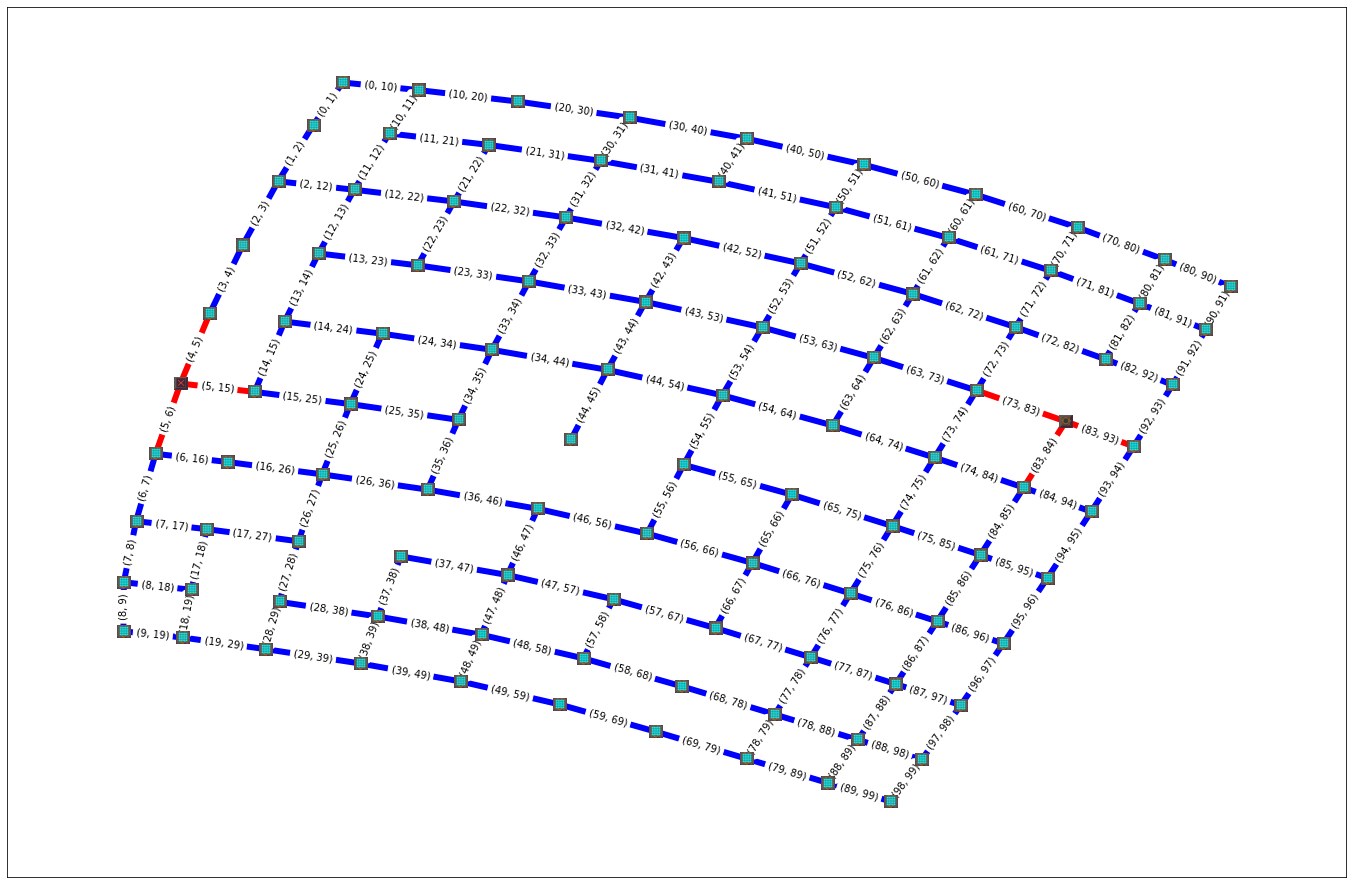

In [7]:
fig, ax = plt.subplots(figsize=(24, 16))

nx.draw_networkx_edges(G1, pos=pos, ax=ax, width=6, edge_color=nx.get_edge_attributes(G1, "color").values())
nx.draw_networkx_edge_labels(G1, pos, {edge : str(edge) for edge in G1.edges})

tr_figure = ax.transData.transform
tr_axes = fig.transFigure.inverted().transform

icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.005
icon_center = icon_size / 2.0

for n in G1.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
    
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    
    a.imshow(G1.nodes[n]["image"])
    a.axis("off")
    
plt.show()

Testing the military distribution network:

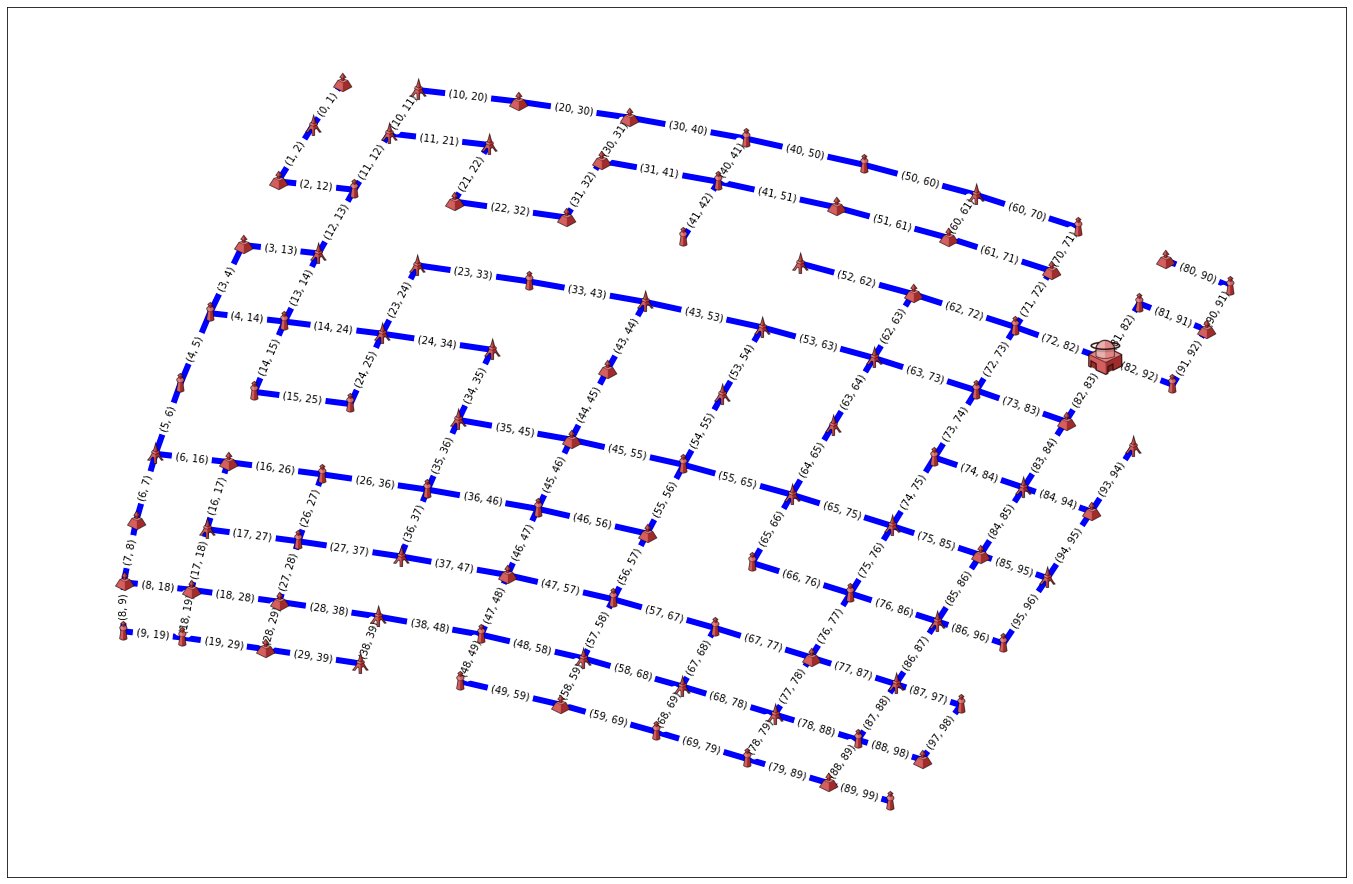

In [8]:
fig, ax = plt.subplots(figsize=(24, 16))

nx.draw_networkx_edges(G2, pos=pos, ax=ax, width=6, edge_color="blue")
nx.draw_networkx_edge_labels(G2, pos, {edge : str(edge) for edge in G2.edges})

tr_figure = ax.transData.transform
tr_axes = fig.transFigure.inverted().transform

icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01
icon_center = icon_size / 2.0

for n in G2.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
    
    if G2.nodes[n]["node_prop"] == "headquarters":
        a = plt.axes([xa - 2*icon_center, ya - 2*icon_center, 2*icon_size, 2*icon_size])
    else:
        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    
    a.imshow(G2.nodes[n]["image"])
    a.axis("off")
    
plt.show()